In [284]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Задание 0

##### диагональная, ортогональная, но не единичная

In [285]:
D = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, -1]])
print(D)

DT = D.transpose()

# определитель ортогональной матрицы равен ±1
print('Определитель матрицы = ', np.linalg.det(DT))

# произведение матрицы на транспонированную равно единичной матрице
print(np.dot(D, DT))

[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
Определитель матрицы =  1.0
[[1 0 0]
 [0 1 0]
 [0 0 1]]


##### верхнетреугольная, ортогональная

In [286]:
# Диагональная матрица является одновременно и верхней треугольной, и нижней треугольной
U = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
print(U)

UT = U.transpose()

# определитель ортогональной матрицы равен ±1
print('Определитель матрицы = ', np.linalg.det(UT))

# произведение матрицы на транспонированную равно единичной матрице
print(np.dot(U, UT))

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]
Определитель матрицы =  1.0
[[1 0 0]
 [0 1 0]
 [0 0 1]]


##### нижнетреугольная, ортогональная

In [287]:
# Диагональная матрица является одновременно и верхней треугольной, и нижней треугольной
L = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
print(L)

LT = L.transpose()

# определитель ортогональной матрицы равен ±1
print('Определитель матрицы = ', np.linalg.det(LT))

# произведение матрицы на транспонированную равно единичной матрице
print(np.dot(L, LT))

[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]
Определитель матрицы =  -1.0
[[1 0 0]
 [0 1 0]
 [0 0 1]]


##### матрица, у которой определитель = 1, и все элементы не равны 0

In [288]:
A = np.array([[-2, -3], [1, 1]])
np.linalg.det(A)

1.0

##### Найдите собственные значения и собственные вектора:

In [289]:
m = np.array([[2, 2], [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [290]:
lambdas, V =  np.linalg.eig(m)
print('Собственные значения - ', lambdas)
print('Собственные вектора - ', V)

Собственные значения -  [1. 4.]
Собственные вектора -  [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


# Задание 1

##### Найдите спектральное разложение матрицы

In [291]:
m = np.array([[1, 2], [2,3]])
print(m)

[[1 2]
 [2 3]]


In [292]:
lambdas, V = np.linalg.eig(m)
print('Собственные значения:')
print(lambdas)
print('Собственные вектора:')
print(V)

Собственные значения:
[-0.23606798  4.23606798]
Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [293]:
D = np.diag(lambdas) # диагональная матрица из собственный значений

# Спектральное разложение представляет собой произведение V * D * V_transposed
# V - матрица столбцы которой являются собственными векторами исходной матрицы m
# V.T - обратная матрице V

print(np.array(V.dot(np.diag(lambdas)).dot(V.T), dtype=float))

[[1. 2.]
 [2. 3.]]


##### Построить зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия использовать MSE

(1797, 64)


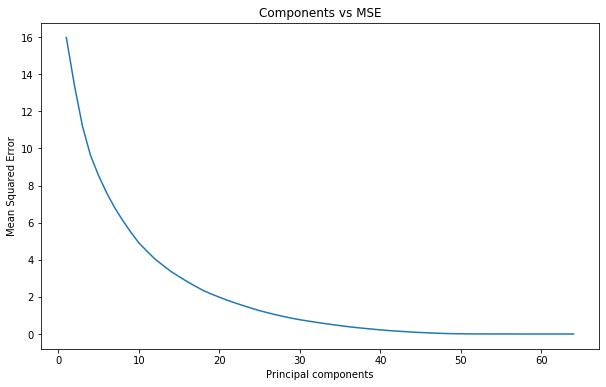

In [294]:
MNIST = load_digits()
print(MNIST.data.shape)

components_range = range(1, 65)

pca = PCA()

errors = []

for i in components_range:
    pca.n_components = i
    f = pca.fit_transform(MNIST.data)
    inversed = pca.inverse_transform(f)
    error = mean_squared_error(MNIST.data, inversed)
    errors.append(error)
    
plt.figure(figsize=(10,6))
plt.plot(components_range, errors)
plt.title('Components vs MSE')
plt.xlabel('Principal components')
plt.ylabel('Mean Squared Error')
plt.show()

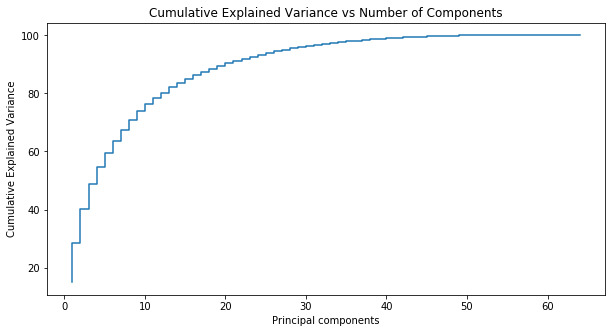

In [295]:
# Cumulative Explained Variance

pca = PCA(n_components=64)
X_r = pca.fit(MNIST.data).transform(MNIST.data)

# Summing explained variance
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.step(components_range, cum_var_exp, label='cumulative explained variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal components')
plt.show()